# 통계 기반의 그래프

`seaborn` 라이브러리가 매력적인 이유는 바로 **통계 차트**입니다.

이번 실습에서는 `seaborn`의 다양한 통계 차트 중 대표적인 차트 몇 개를 뽑아서 다뤄볼 예정입니다.

더 많은 통계 차트를 경험해 보고 싶으신 분은 [공식 도큐먼트](https://seaborn.pydata.org/api.html) 에서 확인하실 수 있습니다.

In [5]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 스타일 설정
sns.set_style('white')

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (8, 8)

In [8]:
Artists = set()
for key in plt.rcParams.keys():
    if "." in key:
        Artists.add(key.split(".")[0])

# 정렬된 상태로 각 요소를 줄바꿈하여 출력
print("\n".join(sorted(Artists)))

_internal
agg
animation
axes
axes3d
boxplot
contour
date
docstring
errorbar
figure
font
grid
hatch
hist
image
keymap
legend
lines
macosx
markers
mathtext
patch
path
pcolor
pcolormesh
pdf
pgf
polaraxes
ps
savefig
scatter
svg
text
tk
webagg
xaxis
xtick
yaxis
ytick


### 샘플 데이터셋 로드

In [9]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* survived: 생존여부
* pclass: 좌석등급
* sex: 성별
* age: 나이
* sibsp: 형제자매 + 배우자 숫자
* parch: 부모자식 숫자
* fare: 요금
* embarked: 탑승 항구
* class: 좌석등급 (영문)
* who: 사람 구분
* deck: 데크
* embark_town: 탑승 항구 (영문)
* alive: 생존여부 (영문)
* alone: 혼자인지 여부

In [10]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


* total_bill: 총 합계 요금표
* tip: 팁
* sex: 성별
* smoker: 흡연자 여부
* day: 요일
* time: 식사 시간
* size: 식사 인원

## Countplot

항목별 개수를 세어주는 `countplot`입니다.

알아서 해당 column을 구성하고 있는 value들을 구분하여 보여줍니다.

[countplot 공식 도큐먼트](https://seaborn.pydata.org/generated/seaborn.countplot.html)

### 세로로 그리기

<Axes: xlabel='class', ylabel='count'>

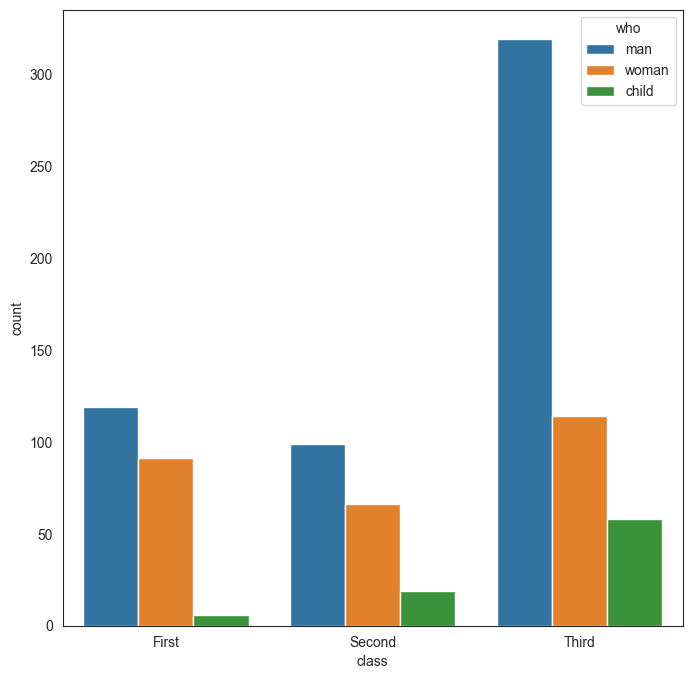

In [11]:
sns.countplot(x='class', hue='who', data=titanic)

### 가로로 그리기

<Axes: xlabel='count', ylabel='class'>

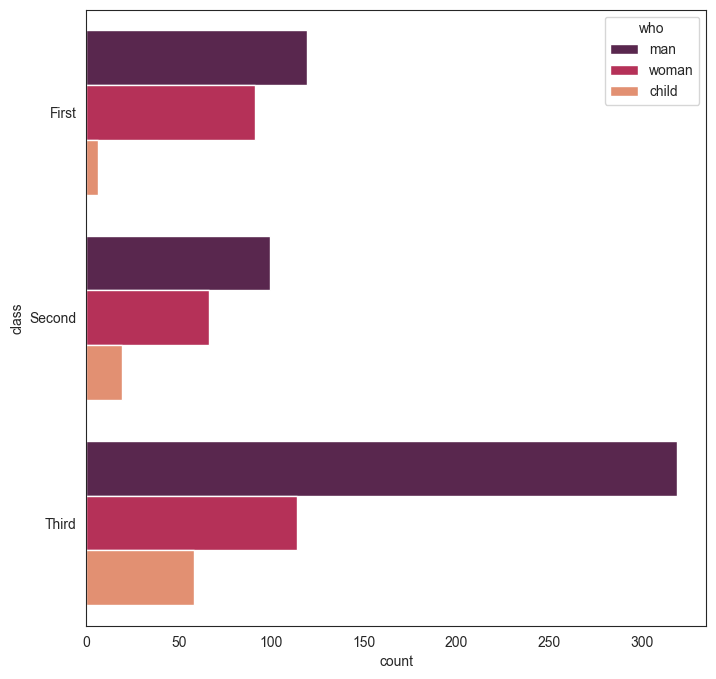

In [12]:
sns.countplot(y='class',hue='who', data=titanic, palette='rocket')

## kdeplot

`kde`는 histograme보다 **부드러운 형태의 분포 곡선**을 보여준다

In [15]:
# 샘플데이터 생성
x = np.random.randn(100)
x

array([ 0.76815081, -0.26723544,  0.49139916, -0.06534042, -1.49946687,
        2.27494526, -0.77043735,  1.59864238,  0.41726786, -0.97163833,
       -1.32747411, -0.60519693,  0.65926957,  0.08109017,  1.80211187,
       -0.45815823, -0.92271498, -0.47507628,  1.07924372, -1.45082852,
       -0.53003968,  0.85206521,  0.9083908 , -0.08156009, -0.48620755,
       -0.16257134, -0.86755234, -1.10507264,  0.16919117,  1.40328594,
       -0.23233227,  0.41914871, -1.31447922, -1.6148832 , -0.65908224,
        0.2805755 , -0.99093124, -0.27232599,  0.10884053,  0.64725431,
       -1.01559008, -0.78093873, -1.37660309, -0.47869198, -0.82382488,
        0.37055852,  0.01219466, -0.02867869, -0.25148643, -0.64244445,
       -0.22620859, -0.18846223, -1.28041773,  1.26026938,  1.08243354,
        0.50326929,  0.60175798, -0.67130467, -0.45197466,  0.68055538,
        0.34921911,  1.6367192 ,  0.75437196,  1.77739198,  0.39258156,
       -1.22276951,  1.17526195, -0.73508006,  0.26680074, -0.06

<Axes: ylabel='Density'>

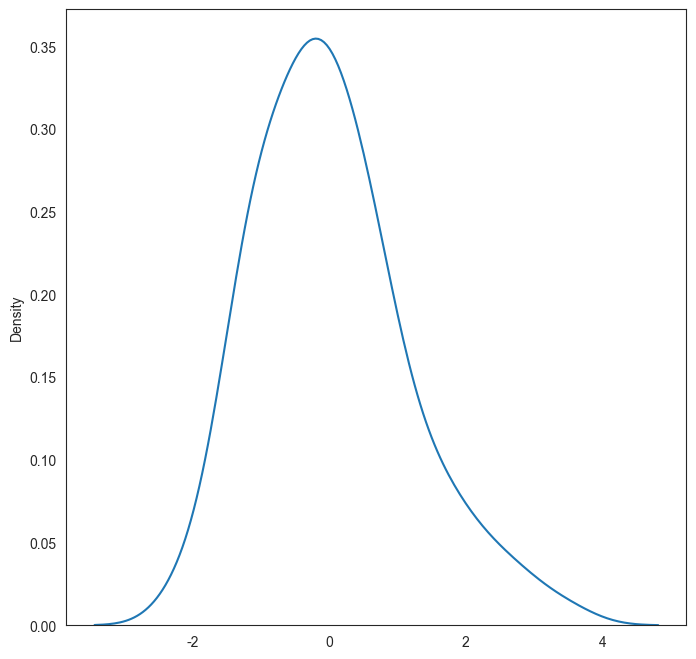

In [14]:
sns.kdeplot(x=x)

## rugplot

`rugplot`의 `rug`는 데이터 위치를 x축 위에 **작은 선분(rug)으로 나타내어 데이터들의 위치 및 분포**를 보여준다.

<Axes: ylabel='Density'>

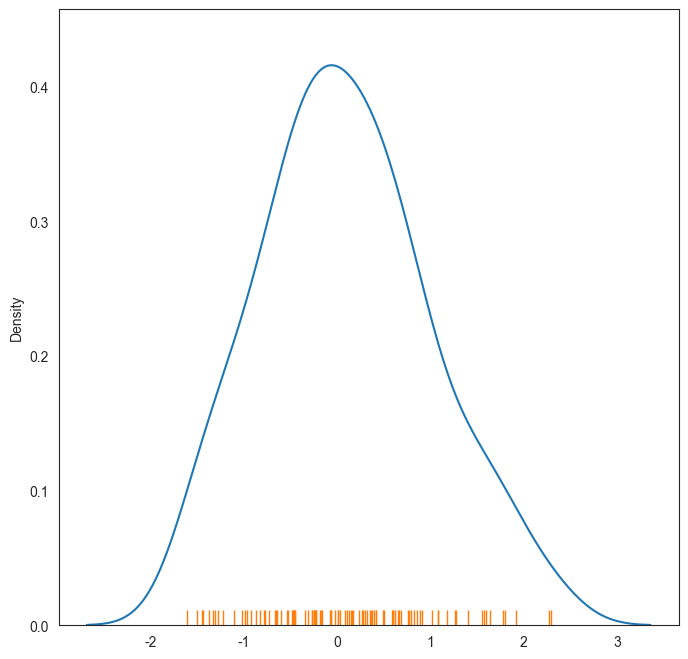

In [16]:
sns.kdeplot(x=x)
sns.rugplot(x=x)

## heatmap

색상으로 표현할 수 있는 다양한 정보를 **일정한 이미지 위에 열분포 형태의 비쥬얼한 그래픽**으로 출력하는 것이 특징이다

[heatmap 도큐먼트](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)

### correlation(상관관계)를 시각화

**corr()** 함수는 데이터의 상관관계를 보여줍니다.

In [18]:
titanic.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


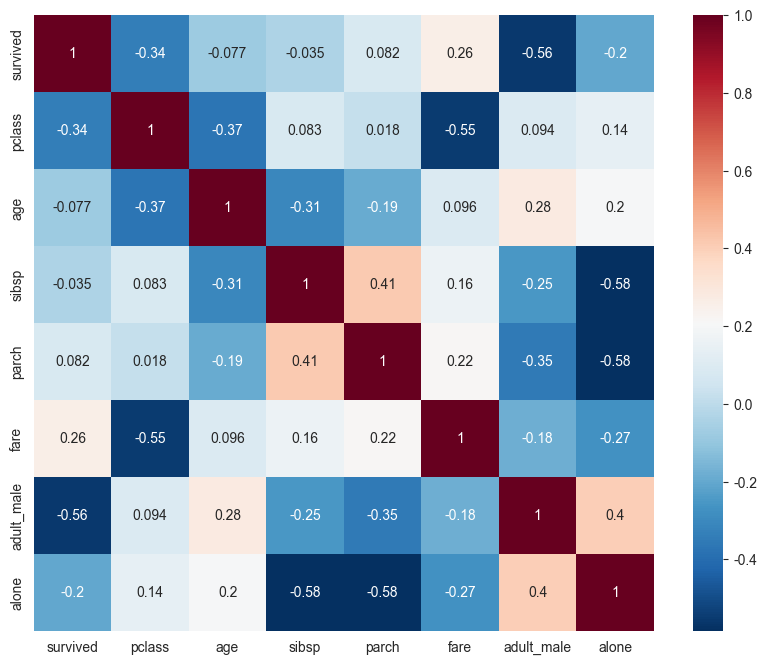

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='RdBu_r')
plt.show()

## pairplot

[pairplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)

pairplot은 그리드(grid) 형태로 각 **집합의 조합에 대해 히스토그램과 분포도**를 그립니다.

또한, 숫자형 column에 대해서만 그려줍니다.

In [22]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 기본 pairplot 생성

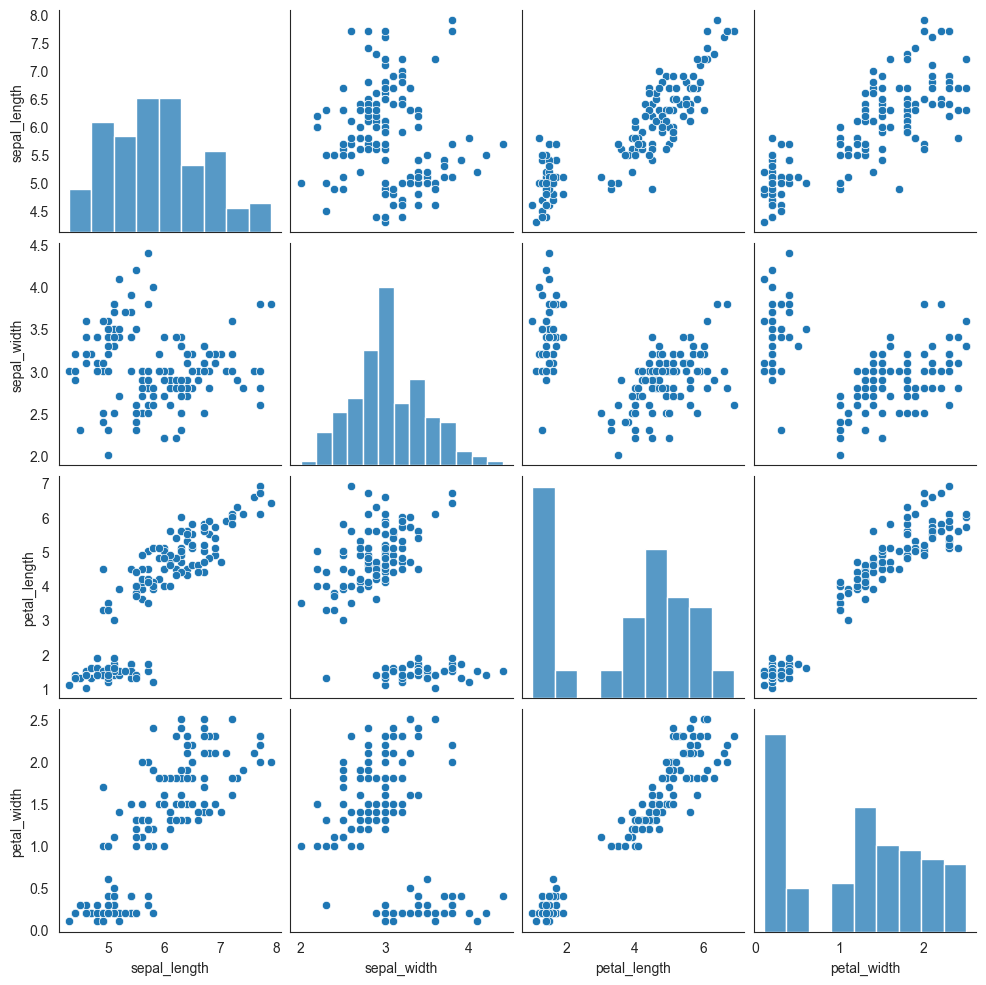

In [23]:
sns.pairplot(iris)

### hue 옵션으로 특성 구분

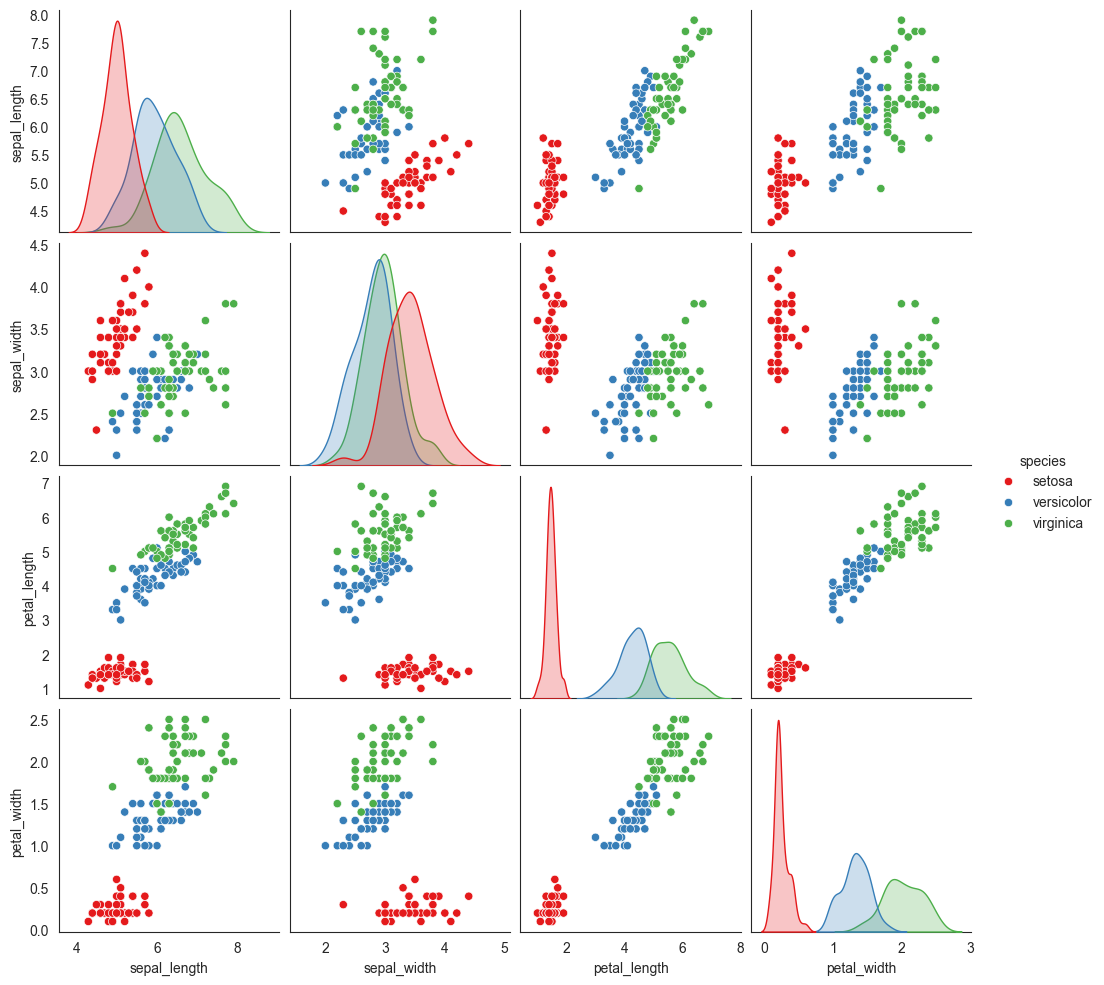

In [24]:
sns.pairplot(iris, hue='species', palette='Set1')

## violinplot

바이올린처럼 생긴 violinplot 입니다.

column에 대한 **데이터의 비교 분포도**를 확인할 수 있습니다.

- 곡선진 부분 (뚱뚱한 부분)은 데이터의 분포를 나타냅니다.
- 양쪽 끝 뾰족한 부분은 데이터의 최솟값과 최댓값을 나타냅니다.

[violinplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

### 기본 violinplot 그리기

<Axes: xlabel='total_bill'>

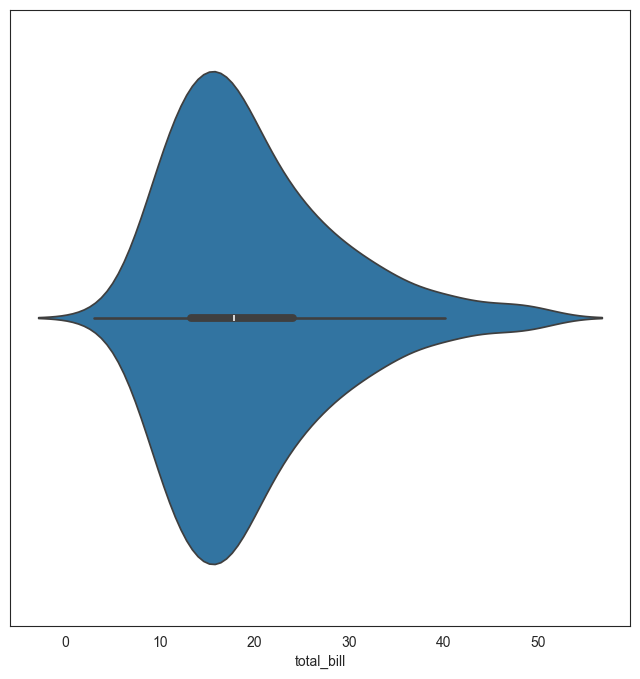

In [25]:
sns.violinplot(x=tips['total_bill'])

### 비교 분포 확인

x, y축을 지정해줌으로써 바이올린을 분할하여 **비교**분포를 볼 수 있습니다.

C:\Users\jshkr\AppData\Local\Temp\ipykernel_23084\1292849800.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day', y='total_bill', data=tips,palette='Set1')


<Axes: xlabel='day', ylabel='total_bill'>

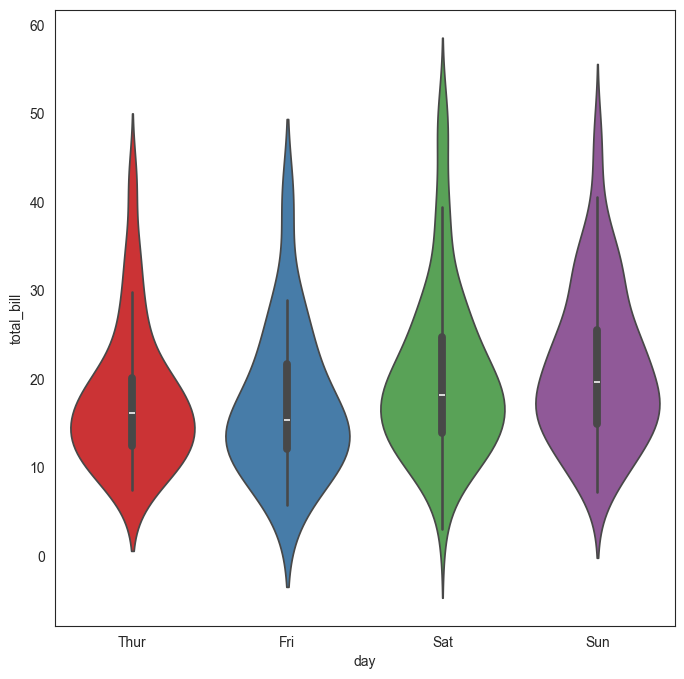

In [29]:
sns.violinplot(x='day', y='total_bill', data=tips,palette='Set1')

### hue 옵션으로 분포 비교

사실 hue 옵션을 사용하지 않으면 바이올린이 대칭이기 때문에 비교 분포의 큰 의미는 없습니다.

하지만, hue 옵션을 주면, **단일 column에 대한 바이올린 모양의 비교**를 할 수 있습니다.

<Axes: xlabel='day', ylabel='total_bill'>

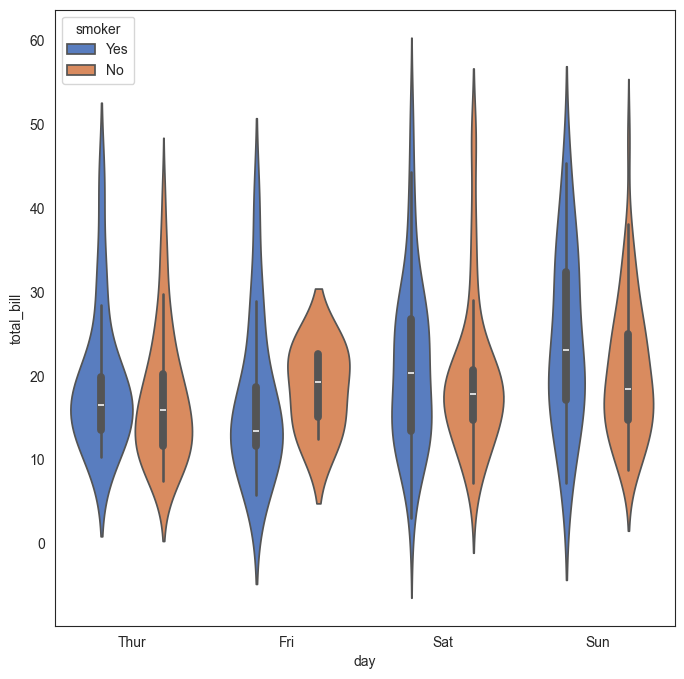

In [30]:
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, palette='muted')

<Axes: xlabel='total_bill', ylabel='day'>

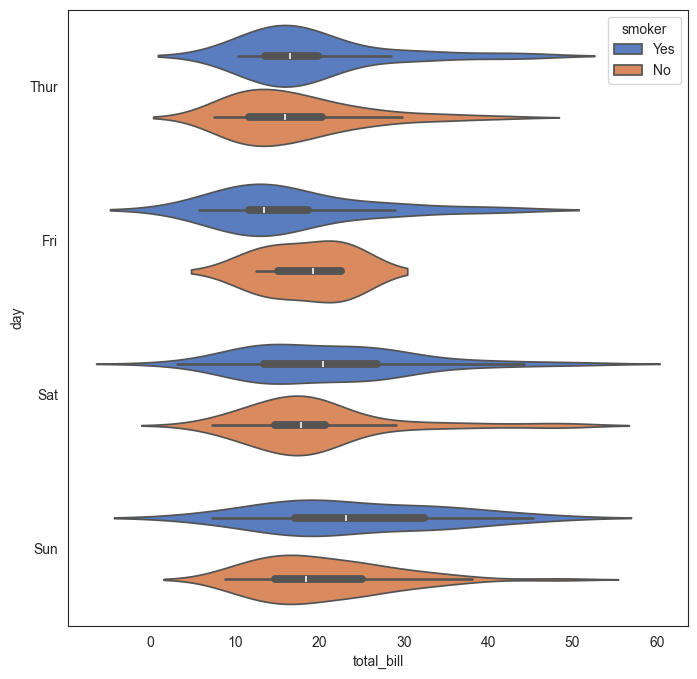

In [31]:
sns.violinplot(x="total_bill", y="day", hue="smoker", data=tips, palette="muted")

### split 옵션으로 바이올린을 합쳐서 볼 수 있습니다

<Axes: xlabel='day', ylabel='total_bill'>

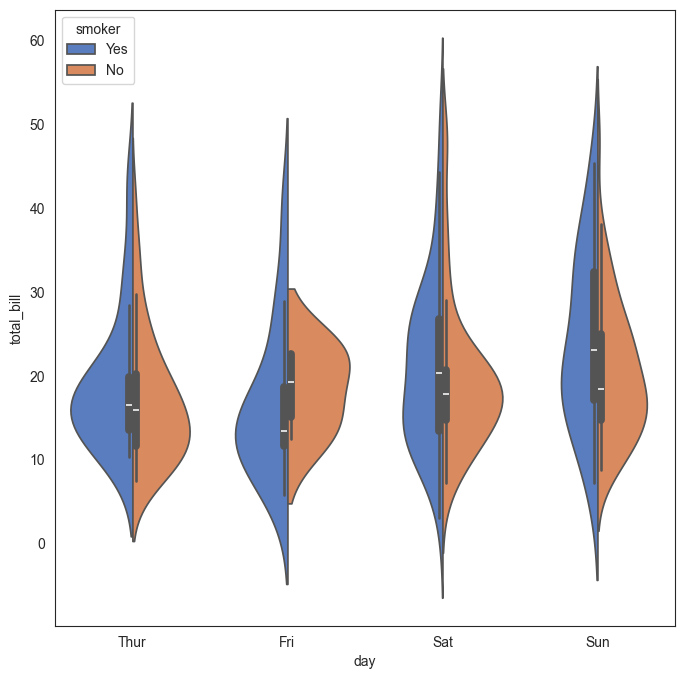

In [32]:
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, palette='muted', split=True)

## lmplot

`lmplot`은 column 간의 **선형관계를 확인하기 용이한 차트**입니다.

또한, **outlier**도 같이 짐작해 볼 수 있습니다.

[lmplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

### 기본 Implot

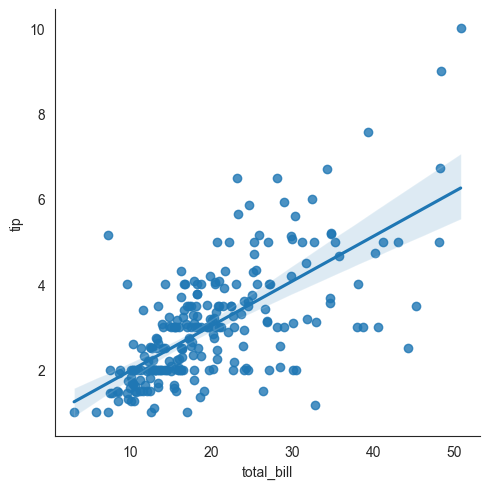

In [33]:
sns.lmplot(x='total_bill', y='tip', data=tips)

### hue 옵션으로 다중 선형관계 그리기

아래의 그래프를 통하여 비흡연자가, 흡연자 대비 좀 더 **가파른 선형관계**를 가지는 것을 볼 수 있습니다.

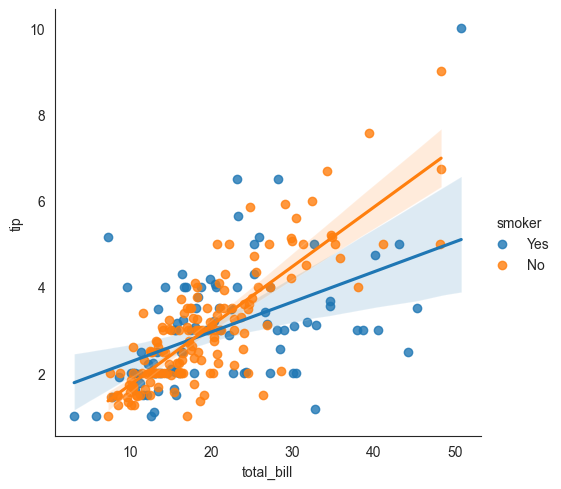

In [35]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

### col 옵션을 추가하여 그래프를 별도로 그려볼 수 있습니다.

또한, `col_wrap`으로 한 줄에 표기할 column의 개수를 명시할 수 있습니다.

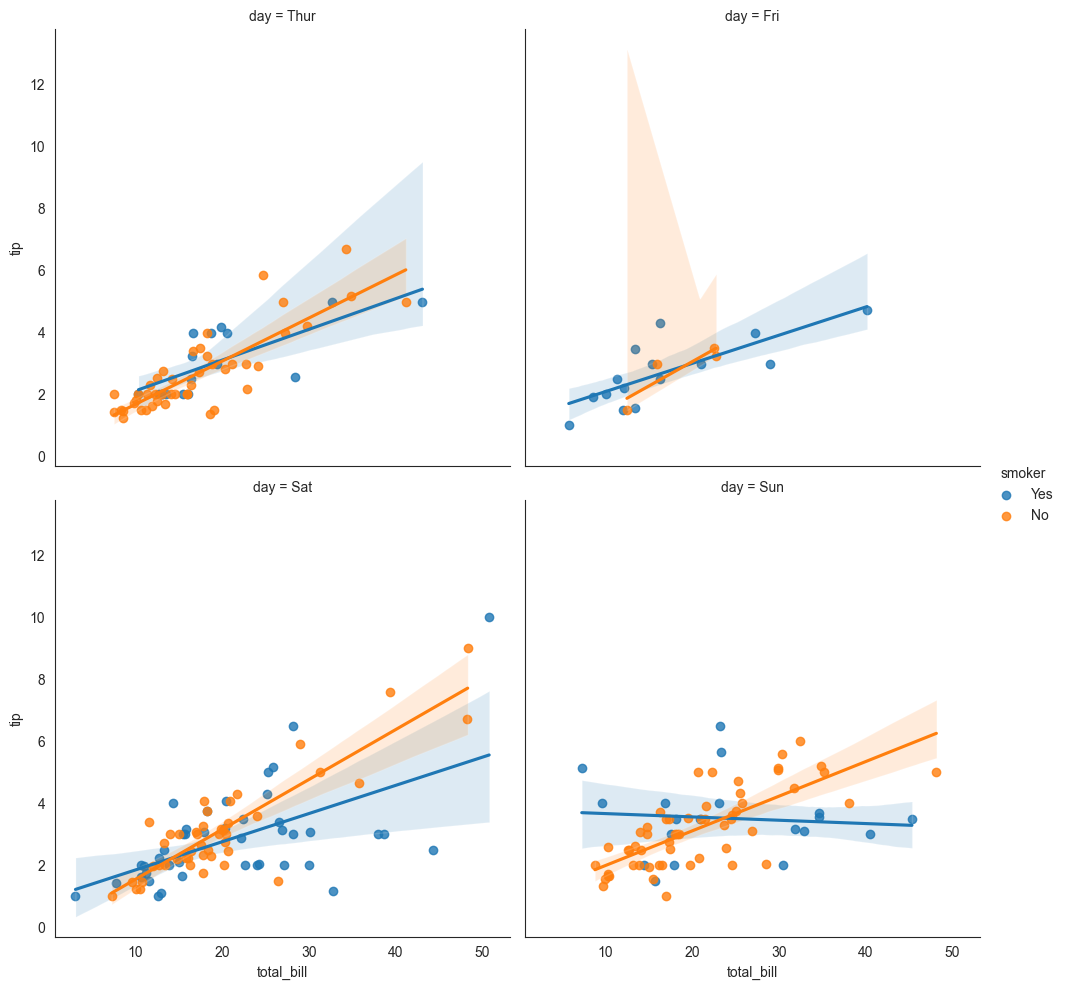

In [36]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='day', col_wrap=2, data=tips)

## jointplot

scatter와 histogram을 동시에 그려줍니다.

숫자형 데이터만 표현 가능하니, 이 점 유의하세요.

[jointplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)

### 기본 jointplot 그리기

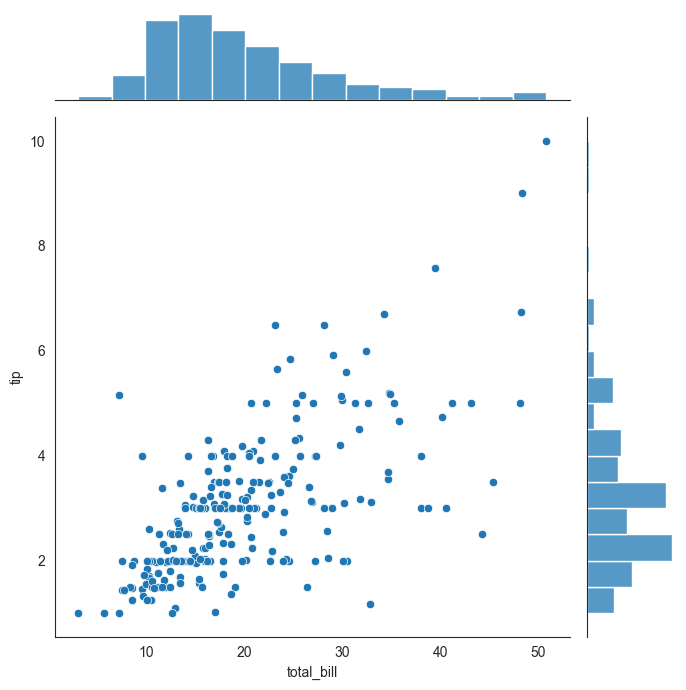

In [37]:
sns.jointplot(x='total_bill', y='tip', height=7, data=tips)

### 선형관계를 표현하는 regression 라인 그리기

옵션에 `kind='reg'`를 추가해 줍니다.

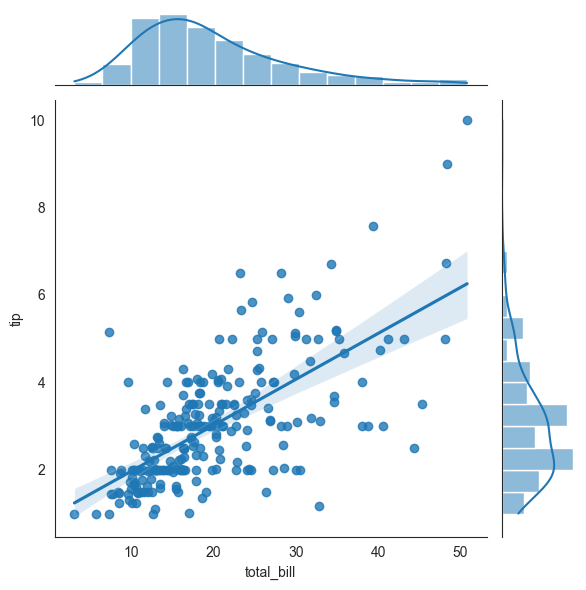

In [38]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

### hex 밀도 보기

**kind='hex'** 옵션을 통해 hex 모양의 밀도를 확인 할 수 있습니다.

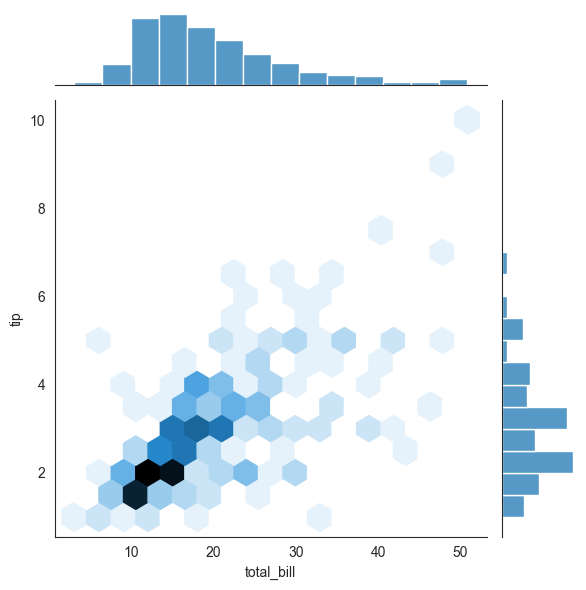

In [39]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

## Swarm Plot

<Axes: xlabel='day', ylabel='total_bill'>

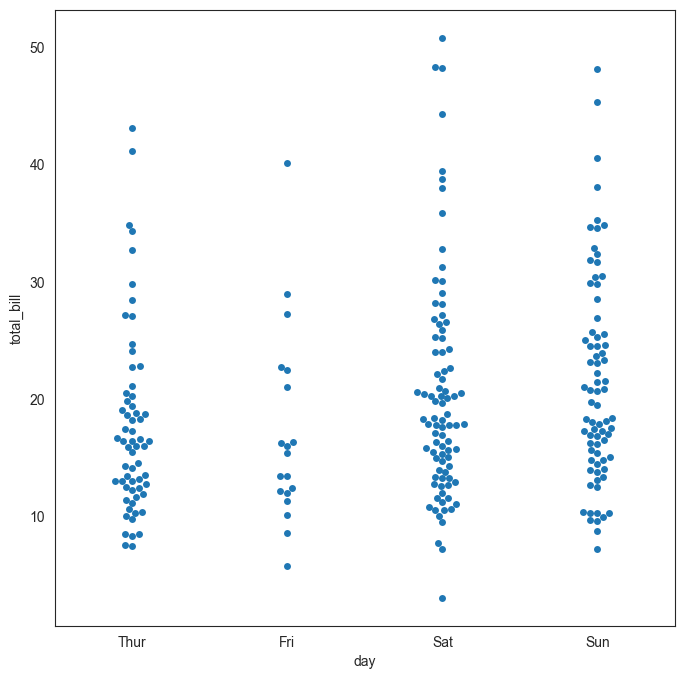

In [40]:
sns.swarmplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

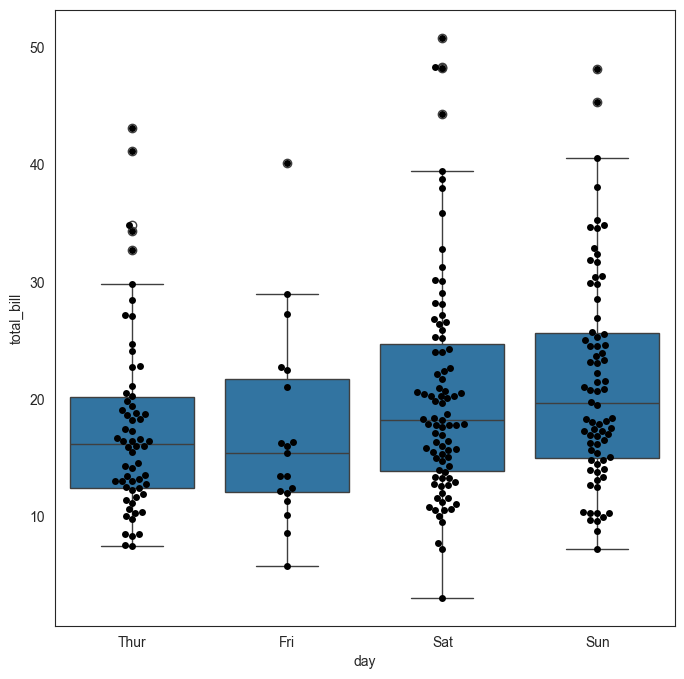

In [41]:
sns.boxplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

## Catplot

카테고리에 따른, row/col으로 분류하여 각각의 그래프를 시각화할 수 있습니다.

[도큐먼트](https://seaborn.pydata.org/generated/seaborn.catplot.html)

- 검은색 bar는 오차막대(error bar) 이며 신뢰구간(confidence interval) 95%

In [42]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### barplot

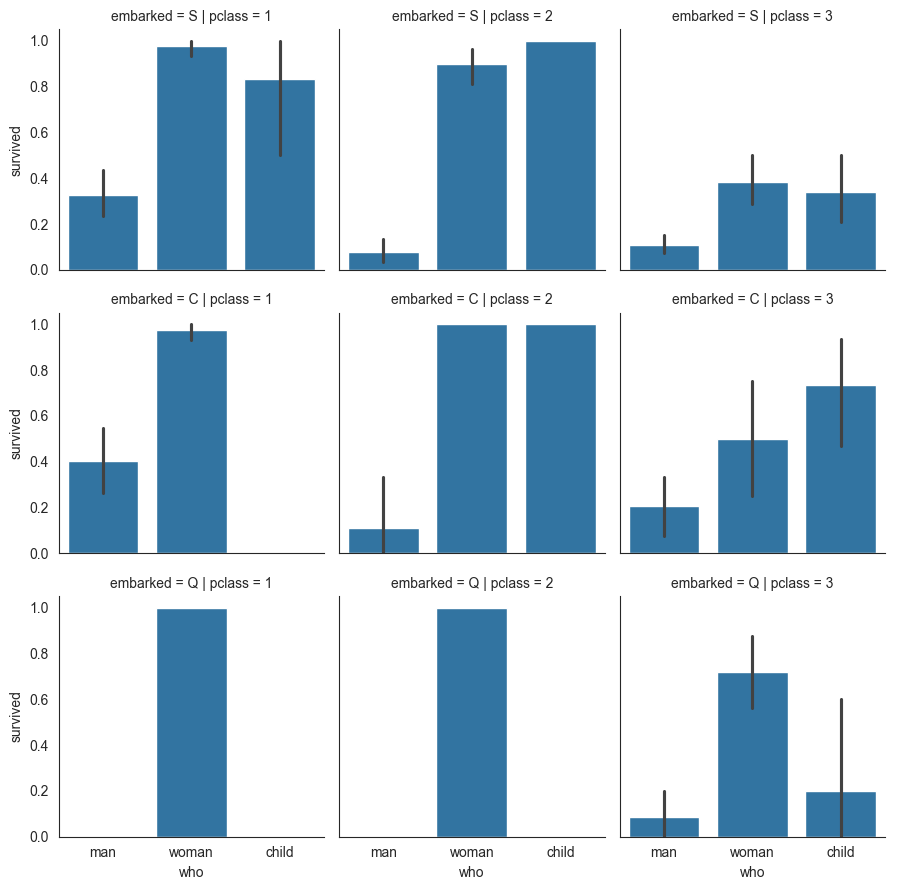

In [46]:
sns.catplot(x='who', y='survived',
            col='pclass',
            row='embarked',
            kind='bar',
            height=3,
            data=titanic)

### countplot

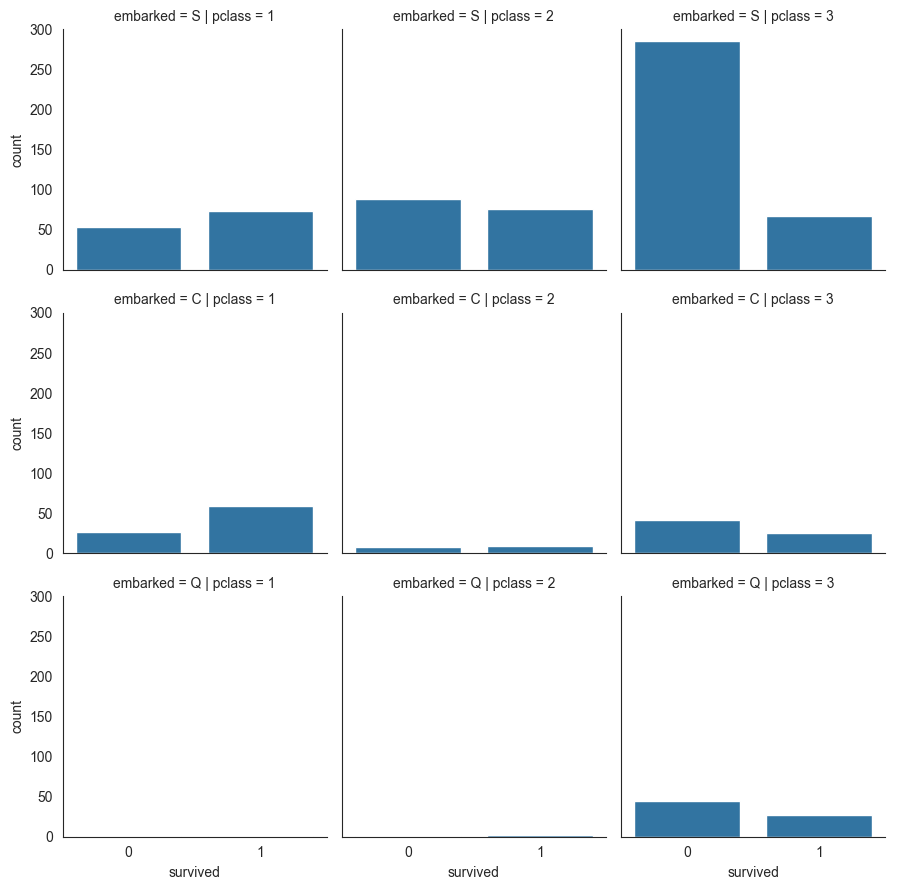

In [51]:
sns.catplot(x='survived', 
            col='pclass', 
            row='embarked',
            kind='count',
            height=3, 
            data=titanic)

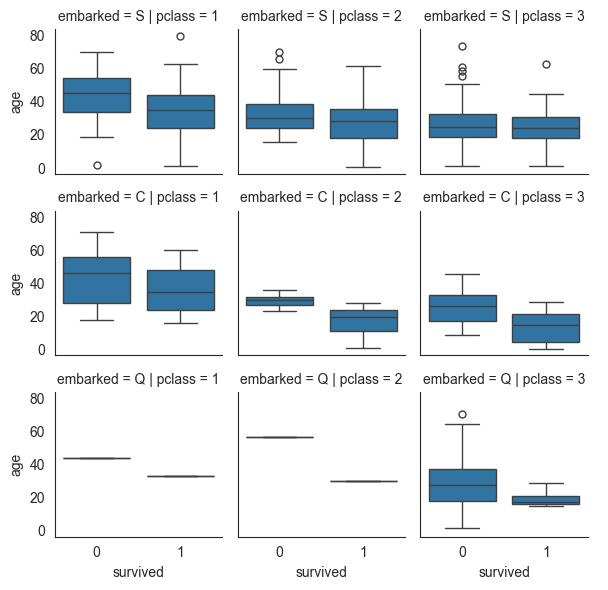

In [50]:
sns.catplot(x='survived',
            y='age',
            col='pclass',
            row='embarked',
            kind='box',
            height=2,
            data=titanic)

### violinplot

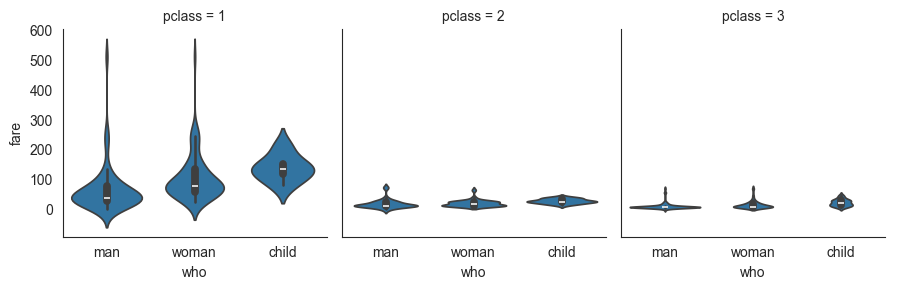

In [52]:
sns.catplot(x='who',
            y='fare',
            col='pclass',
            kind='violin',
            height=3,
            data=titanic)

## 제출

제출을 위해 **violinplot**의 **split 옵션으로 바이올린을 합쳐서 볼 수 있습니다**에서 그렸던 그래프와 똑같은 그래프를 다시 그리세요.

- tips 데이터셋 활용
- x축은 `day`, y축은 `total_bill`
- hue는 `smoker`
- palette는 `muted`'
- `split` 옵션을 활성화

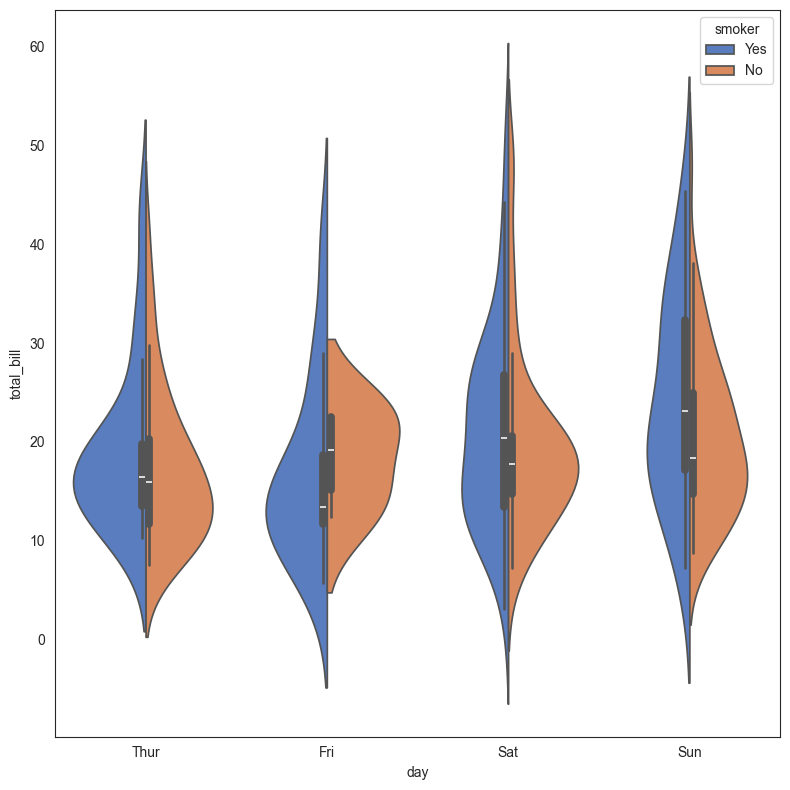

In [54]:
tips = sns.load_dataset('tips')

# TODO: "split 옵션으로 바이올린을 합쳐서 볼 수 있습니다"에서 그렸던 그래프를 그리세요.
sns.violinplot(x='day', y='total_bill', hue='smoker', palette='muted', split=True, data=tips)

# 이 아래를 수정하면 제대로 채점되지 않습니다.
plt.tight_layout()
plt.savefig('result.png')